## Comento Quiz

In [22]:
import numpy as np
import pandas as pd


### 0. 주어진 데이터를 불러온 후 상위 10개 행을 출력해 주세요.
- train.csv 데이터 사용

In [23]:

train = pd.read_csv("train.csv")
import pandas as pd


print(train.head(10))


   id             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0   0  20141013T000000  221900.0         3       1.00         1180      5650   
1   1  20150225T000000  180000.0         2       1.00          770     10000   
2   2  20150218T000000  510000.0         3       2.00         1680      8080   
3   3  20140627T000000  257500.0         3       2.25         1715      6819   
4   4  20150115T000000  291850.0         3       1.50         1060      9711   
5   5  20150403T000000  662500.0         3       2.50         3560      9796   
6   6  20140527T000000  468000.0         2       1.00         1160      6000   
7   7  20140528T000000  310000.0         3       1.00         1430     19901   
8   8  20141007T000000  400000.0         3       1.75         1370      9680   
9   9  20150312T000000  530000.0         5       2.00         1810      4850   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0     1.0           0     0  ...      7

### 1. 각 Column별로 null값이 있는지 확인해주세요.

In [24]:
import pandas as pd


null_counts = train.isnull().sum()
print(null_counts)


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


### 2. grade Column에는 어떤 값이 있는지 확인해주세요.

In [25]:

print(train["grade"])

0        7
1        6
2        8
3        7
4        7
        ..
15030    9
15031    9
15032    8
15033    8
15034    7
Name: grade, Length: 15035, dtype: int64


### 3. zipcode에 대해서 문자열로 바꿔주세요.

In [26]:
import pandas as pd



train['zipcode'] = train['zipcode'].astype(str)


print(train['zipcode'])


0        98178
1        98028
2        98074
3        98003
4        98198
         ...  
15030    98056
15031    98136
15032    98103
15033    98146
15034    98144
Name: zipcode, Length: 15035, dtype: object


### 4. loc를 활용하여 date, price, grade만 출력해주세요.

In [27]:
import pandas as pd


selected_columns = train.loc[:, ['date', 'price', 'grade']]


print(selected_columns)


                  date      price  grade
0      20141013T000000   221900.0      7
1      20150225T000000   180000.0      6
2      20150218T000000   510000.0      8
3      20140627T000000   257500.0      7
4      20150115T000000   291850.0      7
...                ...        ...    ...
15030  20141014T000000   610685.0      9
15031  20150326T000000  1007500.0      9
15032  20140521T000000   360000.0      8
15033  20150223T000000   400000.0      8
15034  20141015T000000   325000.0      7

[15035 rows x 3 columns]


### 5. grade가 13인 행들만 보여주세요.

In [28]:
import pandas as pd


filtered_train = train.loc[train['grade'] == 13]


print(filtered_train)


          id             date      price  bedrooms  bathrooms  sqft_living  \
3134    3134  20140804T000000  5570000.0         5       5.75         9200   
3867    3867  20141010T000000  1780000.0         4       3.25         4890   
4266    4266  20141120T000000  2385000.0         4       4.00         6330   
4957    4957  20140701T000000  3800000.0         5       5.50         7050   
5108    5108  20141013T000000  7700000.0         6       8.00        12050   
5560    5560  20140923T000000  3200000.0         6       5.00         7100   
6469    6469  20140919T000000  6885000.0         6       7.75         9890   
7246    7246  20141212T000000  2983000.0         5       5.50         7400   
10152  10152  20140611T000000  2888000.0         5       6.25         8670   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
3134      35069     2.0           0     0  ...     13        6200   
3867      13402     2.0           0     0  ...     13        4890   
4266      13

### 6. grade별로 평균 가격을 보여주세요.

In [29]:
import pandas as pd


average_price_by_grade = train.groupby('grade')['price'].mean()


print(average_price_by_grade)


grade
1     1.420000e+05
3     2.710000e+05
4     2.097413e+05
5     2.510696e+05
6     3.001554e+05
7     4.015281e+05
8     5.423156e+05
9     7.734781e+05
10    1.062482e+06
11    1.522459e+06
12    2.220540e+06
13    4.132333e+06
Name: price, dtype: float64


### 7. 6번에서 만든 데이터를 원본 데이터와 inner로 merge해주세요.

In [32]:
import pandas as pd

average_price_by_grade = train.groupby('grade')['price'].mean().reset_index()
average_price_by_grade.rename(columns={'price': 'average_price'}, inplace=True)

merged_train = pd.merge(train, average_price_by_grade, on='grade', how='inner')

print(merged_train)


          id             date      price  bedrooms  bathrooms  sqft_living  \
0          0  20141013T000000   221900.0         3       1.00         1180   
1          3  20140627T000000   257500.0         3       2.25         1715   
2          4  20150115T000000   291850.0         3       1.50         1060   
3          6  20140527T000000   468000.0         2       1.00         1160   
4          7  20140528T000000   310000.0         3       1.00         1430   
...      ...              ...        ...       ...        ...          ...   
15030   5560  20140923T000000  3200000.0         6       5.00         7100   
15031   6469  20140919T000000  6885000.0         6       7.75         9890   
15032   7246  20141212T000000  2983000.0         5       5.50         7400   
15033  10152  20140611T000000  2888000.0         5       6.25         8670   
15034  13522  20140926T000000   142000.0         0       0.00          290   

       sqft_lot  floors  waterfront  view  ...  sqft_above  sqf

### 8. Date Column을 이용해 년, 월, 일에 해당하는 3개의 새로운 Column을 만들어주세요.

In [33]:
train_8 = pd.DataFrame({
    'year': ['2014', '2015', '2015', '2014', '2015'],
    'month': ['10', '02', '02', '06', '01'],
    'day' : ['13', '25', '18', '27', '15']
})
import pandas as pd

train_8 = pd.DataFrame({
    'year': ['2014', '2015', '2015', '2014', '2015'],
    'month': ['10', '02', '02', '06', '01'],
    'day': ['13', '25', '18', '27', '15']
})


train_8['date'] = pd.to_datetime(train_8['year'] + '-' + train_8['month'] + '-' + train_8['day'])


print(train_8)


   year month day       date
0  2014    10  13 2014-10-13
1  2015    02  25 2015-02-25
2  2015    02  18 2015-02-18
3  2014    06  27 2014-06-27
4  2015    01  15 2015-01-15


### 9. 이후 Price를 예측하는 모델을 제작하기 위해 추가적인 변수를 만드려고 합니다. Price의 데이터 분포를 확인하고 1개 이상의 EDA를 통해 의견을 제시해주세요.

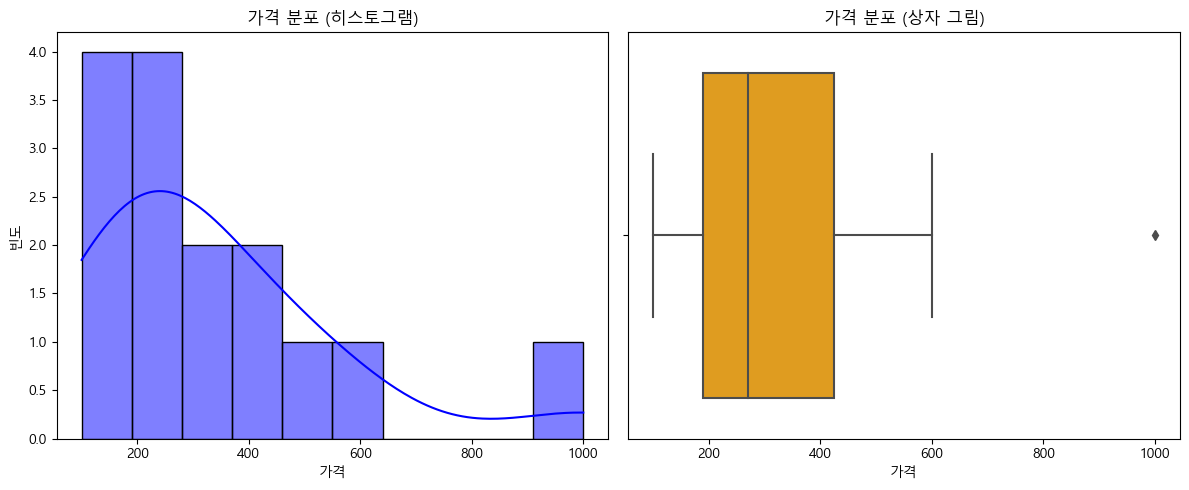

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Matplotlib 설정
plt.rc('font', family='Malgun Gothic')  # 한글 폰트 설정
plt.rc('axes', unicode_minus=False)  # 유니코드 마이너스 처리

# 예제 데이터
train = pd.DataFrame({
    'price': [150, 200, 250, 300, 100, 450, 500, 600, 120, 180, 220, 270, 310, 400, 1000]
})

# 가격 분포 시각화
plt.figure(figsize=(12, 5))

# 히스토그램
plt.subplot(1, 2, 1)
sns.histplot(train['price'], kde=True, bins=10, color='blue')
plt.title('가격 분포 (히스토그램)')
plt.xlabel('가격')
plt.ylabel('빈도')

# 상자 그림
plt.subplot(1, 2, 2)
sns.boxplot(x=train['price'], color='orange')
plt.title('가격 분포 (상자 그림)')
plt.xlabel('가격')

plt.tight_layout()
plt.show()


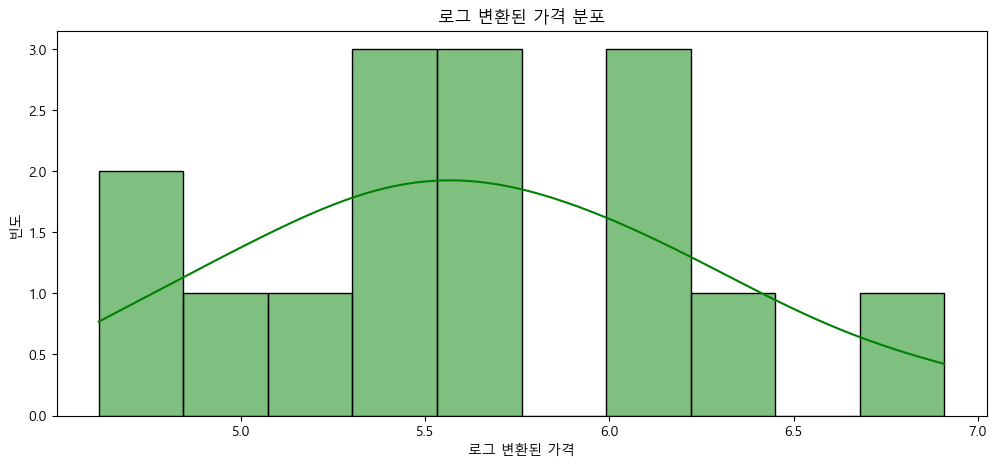

    price  log_price price_category
0     150   5.017280             저가
1     200   5.303305             중가
2     250   5.525453             중가
3     300   5.707110             중가
4     100   4.615121             저가
5     450   6.111467             고가
6     500   6.216606             고가
7     600   6.398595             고가
8     120   4.795791             저가
9     180   5.198497             저가
10    220   5.398163             중가
11    270   5.602119             중가
12    310   5.739793             중가
13    400   5.993961             고가
14   1000   6.908755             고가


In [40]:
import numpy as np

# 1. 로그 변환된 가격 변수 추가
train['log_price'] = np.log1p(train['price'])  # log(1 + price)

# 2. 가격 범주화 변수 추가
def categorize_price(price):
    if price < 200:
        return '저가'
    elif price < 400:
        return '중가'
    else:
        return '고가'

train['price_category'] = train['price'].apply(categorize_price)

# 추가 변수 시각화 (로그 변환 가격 히스토그램)
plt.figure(figsize=(12, 5))

# 로그 변환된 가격 히스토그램
sns.histplot(train['log_price'], kde=True, bins=10, color='green')
plt.title('로그 변환된 가격 분포')
plt.xlabel('로그 변환된 가격')
plt.ylabel('빈도')
plt.show()

# 데이터프레임 출력
print(train)


#### 1) 데이터 분석하기

In [46]:
# 로그 변환:
# price가 오른쪽으로 치우쳐 있기 때문에 로그 변환을 통해 정규화된 분포로 변환하는 것이 유효합니다. 이는 선형 회귀와 같은 모델에서 특히 유용하며, 이상치로 인한 모델의 영향을 줄일 수 있습니다.

# 가격 범주화:
# 가격을 범주형 변수로 변환해 특정 구간별로 다른 패턴이 나타나는지 확인할 수 있습니다. 예를 들어, "고가 제품"일수록 특정 요인이 가격에 더 큰 영향을 미칠 가능성을 탐구할 수 있습니다.

